In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
##to visulatize graphs instantly
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatype of attributes
df.info()

#we have float and int objects. the other objects are categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Data Preprocessing

In [6]:
# check for null values
df.isnull().sum()

##we have two attributes with so many missing values i.e item weight and outlet_size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
##removing unnecssary columns

cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts()) ##value count function gives the count of unique values in one column
    print()
    
## there are few values that are same but considered as different because of the representation so we need to make them into one.
##for instance in Item_Fat_content low Fat and low fat are considered different but they are same

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [11]:
# fill the missing values

##here we are using pivot table in pandas. this will be useful for creating new categorical column and
## if we don't specify the index means it will simply average of that column.
#when the index is specified it will average based on index
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

##here it has calculated the average of each identifier

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

##this will say false if that column has no missing value otherwise true

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
miss_bool.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: Item_Weight, dtype: bool

In [14]:
##in this code cell, we are replacing the missing values in Item weight.
## if the item weight is null it will replaced by the mean of that particular item identifier. 
## if that value is not there in item identifier it will be replaced by the mean of item_weight

for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [15]:
##for my reference
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        print(i,item)

7 FDP10
18 DRI11
21 FDW12
23 FDC37
29 FDC14
36 FDV20
38 FDX10
39 FDB34
49 FDS02
59 FDI26
62 FDF09
63 FDY40
64 FDY45
77 FDN48
83 NCL18
84 FDR12
87 FDQ49
95 FDU04
98 NCP18
101 FDD10
108 DRE60
112 FDW39
113 FDX34
130 FDY25
132 NCR53
136 FDH35
153 DRK12
161 FDR07
168 NCB30
178 DRY23
180 FDQ28
182 NCO17
184 FDT12
186 FDO08
194 NCX06
198 FDE40
199 FDX49
203 FDI24
208 FDS45
225 NCO07
227 DRF27
229 FDX25
230 NCX42
231 FDG33
235 DRM47
236 FDS46
238 FDX21
239 NCU05
250 DRF15
255 FDQ04
275 FDH19
279 FDZ10
282 NCF07
284 FDJ08
291 FDM25
294 FDV60
300 FDV13
301 FDV20
313 FDM50
319 FDY31
320 DRQ35
328 NCW17
331 FDN60
333 FDN58
334 FDC41
335 FDO01
340 FDY49
344 FDJ22
357 FDN39
359 FDJ56
364 FDX26
370 FDZ07
371 NCW53
380 FDX31
381 FDR43
388 FDP22
393 FDU02
400 NCK31
404 FDU45
405 FDW24
409 DRP35
417 FDW35
430 FDW23
433 DRH03
434 FDW27
446 FDS09
449 NCO54
456 FDS26
458 DRB48
472 FDU56
485 FDN48
487 FDX14
489 FDH28
490 NCT41
491 FDO11
497 FDR56
504 FDE53
509 DRN36
518 FDZ47
519 NCJ54
527 NCE06
537 FDO19


5729 NCV54
5732 FDC34
5735 FDK20
5738 FDR14
5745 FDO31
5746 FDP27
5761 FDB17
5763 DRI39
5766 NCT29
5795 FDU24
5799 FDF56
5800 FDB44
5804 FDC52
5806 FDS40
5812 FDI22
5816 FDZ31
5821 FDB37
5825 FDB45
5826 FDC08
5843 FDA43
5847 NCX06
5853 NCT06
5854 FDH56
5857 FDB04
5859 FDK51
5860 FDB33
5862 NCE30
5869 FDQ55
5871 NCW29
5875 FDT14
5879 NCA42
5880 FDG08
5894 FDH31
5919 NCX30
5920 FDA20
5933 FDK36
5934 NCP55
5935 FDO56
5937 FDX45
5940 NCB42
5946 FDU33
5951 DRK39
5954 DRI59
5957 FDE29
5967 NCO02
5972 FDT15
5974 DRG01
5977 FDK09
5990 FDQ07
5992 NCM06
5993 FDL15
6000 FDO37
6008 FDS23
6015 FDJ44
6017 FDK33
6019 FDG10
6028 NCD54
6035 NCB18
6039 FDE35
6040 FDP49
6041 NCQ05
6051 FDN56
6057 DRA59
6059 FDE24
6064 FDZ55
6066 FDU46
6077 FDM01
6082 NCI29
6090 FDO40
6093 FDE21
6099 FDN57
6100 FDO38
6102 FDP27
6105 NCA05
6120 FDM24
6125 FDM27
6129 NCN53
6134 FDF40
6135 FDH34
6139 NCL07
6153 FDR24
6169 FDW51
6179 DRA59
6184 FDZ19
6186 FDC28
6204 FDY56
6208 FDB35
6214 FDG34
6221 FDB23
6238 DRM37
6241 FDV19

In [16]:
##checking if there are any null values
df['Item_Weight'].isnull().sum()

0

In [17]:
## if you are replacing the null value using numerical variable go for mean/median if it's categorical variable go for mode.

In [18]:
## outlet size also contains few missing value so we are going to fill that using outlet type using mode function
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
miss_bool = df['Outlet_Size'].isnull()
## this miss bool is a variable which will have true when it is null and false when it is not null


##df.loc[miss_bool, 'Outlet_Size'] this variable represents the outlet size which has null values
## df.loc[miss_bool, 'Outlet_Type'] this variable represents the outlet type where the miss boolvalues are true that is where the
## outlet size is null
## this is replaced with the mode function
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [20]:
df.loc[miss_bool, 'Outlet_Type'] ## for my reference not needed in code

3           Grocery Store
8       Supermarket Type1
9       Supermarket Type1
25      Supermarket Type1
28          Grocery Store
              ...        
8502    Supermarket Type1
8508    Supermarket Type1
8509        Grocery Store
8514    Supermarket Type1
8519    Supermarket Type1
Name: Outlet_Type, Length: 2410, dtype: object

In [21]:
df['Outlet_Size'].isnull().sum() ## checking if the null values are replaced

0

In [22]:
## there are few zeroes in the item visibility variable
sum(df['Item_Visibility']==0) 

526

In [23]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [24]:
sum(df['Item_Visibility']==0) 

0

In [25]:
# combine item fat content because fatcontent is mentioned differently like LF low Fat so
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### creating new attributes

In [27]:
## From item identifier we are creating new category new item type, because FD: Food, DR: Drink, NC: Non Consumable
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [28]:
##Renaming those variable

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [29]:
## now updating the item fat content variable, if it's non cosumable item fat content will become non-edible

df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [30]:
# create small values for establishment year i.e how many years have the store been
## since it's a 2013 dataset

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


#### EDA

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

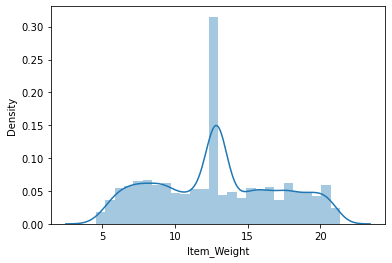

In [32]:
##distplor is for numerical values
## in the graph we can see mean is higher, since we replace the null values with mean

sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

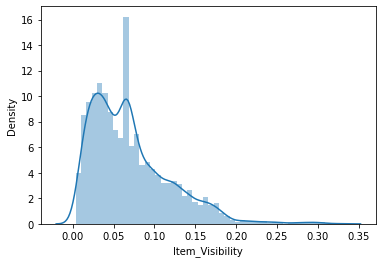

In [33]:
#We can see it's left skewed,the mean is highermbecause we replaced all the zeroes with the mean,But that will not create a prob

sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

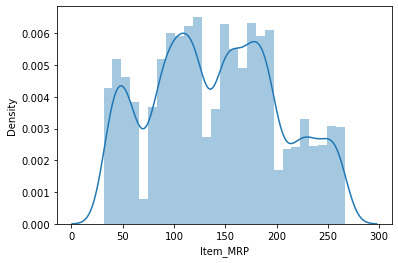

In [34]:
sns.distplot(df['Item_MRP'])

## From the graph we can say item price ranges from 50 to 270.
## there seems to be 4 classes so we can say these are costly prod, these are cheap.


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

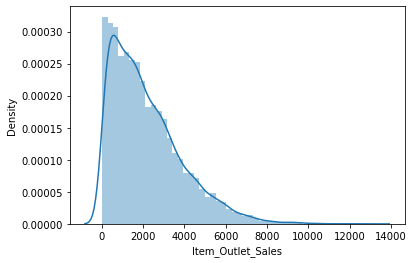

In [35]:
sns.distplot(df['Item_Outlet_Sales'])

##they are ranging fromm 0 to 14000, and it's left skewed
## the values are very large so we are going to normalize using log standardization, we can also use min max or scalar method.

In [36]:
# log transformation
## we are adding 1 to avoid infinity values
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

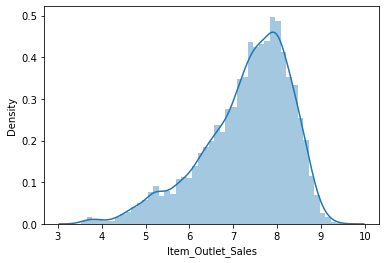

In [37]:
sns.distplot(df['Item_Outlet_Sales'])

##now the values are minimal, so the model can predict with lesserror. 
## now it looks like uniform dist as well

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

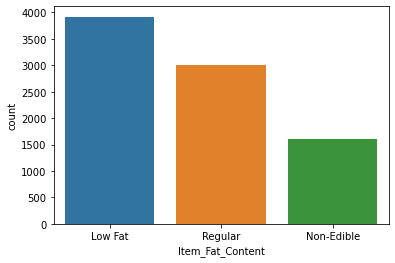

In [38]:
sns.countplot(df["Item_Fat_Content"])

## from this graph we can say most of the products are low fat and only less products are non edible

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

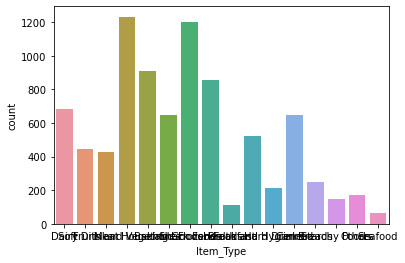

In [39]:
sns.countplot(df["Item_Type"])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

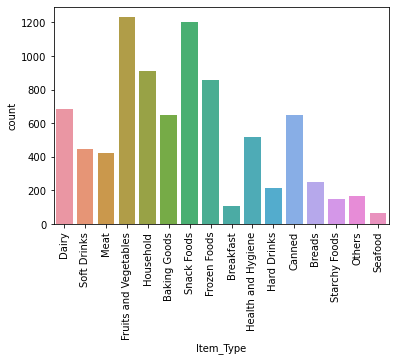

In [40]:
##there are lots of value in item type so if we plot means it will clumsy so we are using matplotlib
# plt.figure(figsize=(15,5)) to increase the figure sire
## we are displaying variables in vertical manner
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

##now the variable are represented in vertical manner and we can change the degree to change it to some other position.
## from the graph we can say most of the foods purchased are snacks ,fruits and vegetables

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

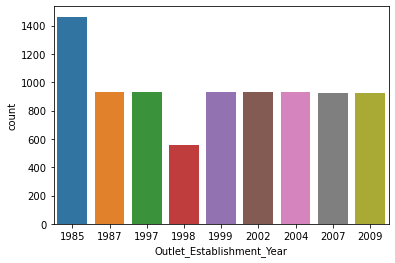

In [41]:
## from the graph we can all the outlets are equallt distributed except one which is established longer.

sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

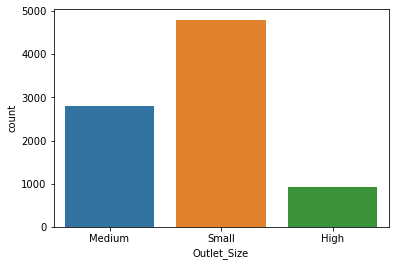

In [42]:
sns.countplot(df['Outlet_Size'])

##most of outlet are small and high are small
## large amount of stores are small stores

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

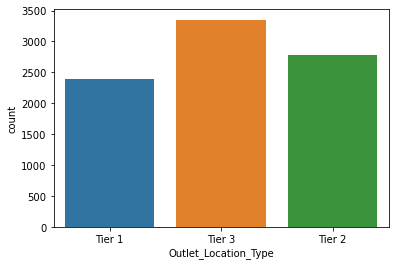

In [43]:
sns.countplot(df['Outlet_Location_Type'])
#mostly equallt distributed

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

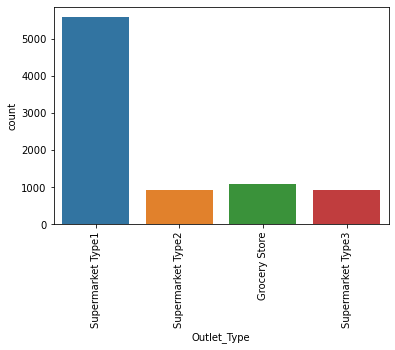

In [44]:
## we are displaying variables in vertical manner
l = list(df['Outlet_Type'].unique())
chart = sns.countplot(df['Outlet_Type'])
chart.set_xticklabels(labels=l, rotation=90)
sns.countplot(df['Outlet_Type'])

## Most of the stores are supermarket type 1

<AxesSubplot:>

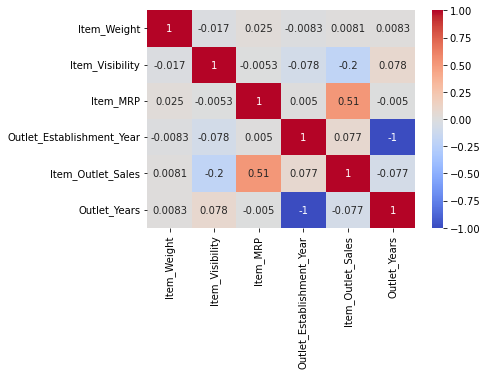

In [45]:
corr = df.corr() ##pandas function
sns.heatmap(corr, annot=True, cmap='coolwarm')

##in the plot we can ssee that outlet establishment year and outlet year are highly negatively correlated
## that is because outlet weights are derived from outlet establishment year

## Item output sales is the output variable, so in that we can see which is impacting the output
## in the graph we can see that Item MRp is hughly correlated with the output because it has large values

In [46]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4


#### Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder ##importing the module
le = LabelEncoder() ##initialization  

## we are Outlet_Identifier to numerical variable, because based on specific stores prediction may affect.
## so we are converting the categorical variable to label encoder for model improvement
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

##converting all categorical variable
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    
## all the categorical variables are converted to numerical variable so the model can use those

In [48]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3


<AxesSubplot:>

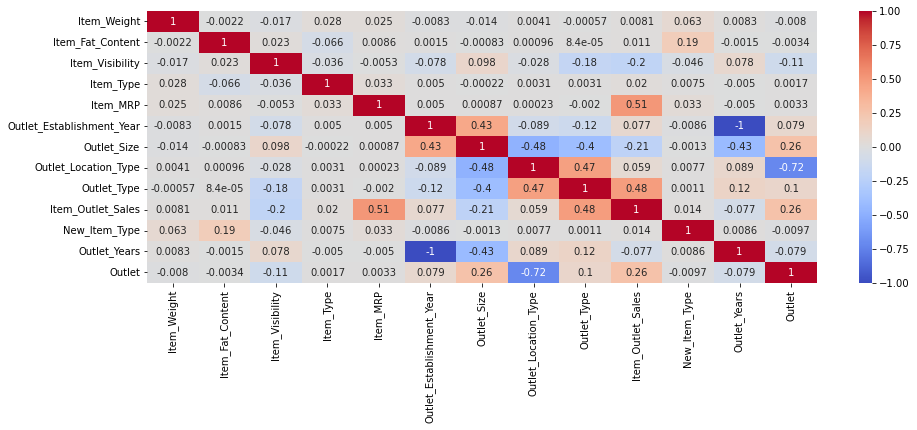

In [49]:
##for my reference

plt.figure(figsize=(15,5))
corr = df.corr() ##pandas function
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [50]:
## for getting more accurate prediction in the model we will use one hot encoding
## it will create new column for each category
## based on research one hot encoding will raise the accuracy to .2 to .5 
## time consuming
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

##now we have 26 features 

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [51]:
##Input Split

X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

##we can also use cross validation to split the dataset

In [52]:
pd.set_option('display.max_columns', None)
X.head(1)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.3,0.016047,4,249.8092,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [78]:
y.head(1)

0    8.225808
Name: Item_Outlet_Sales, dtype: float64

In [79]:
df.corr()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
Item_Weight,1.000000e+00,-0.017450,0.028015,0.024756,-0.008301,0.008059,0.008301,-0.007975,-0.016422,0.046858,-0.021157,0.012313,0.004152,-0.011676,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,2.542763e-14,-0.050492,-0.007953,0.046858
Item_Visibility,-1.745026e-02,1.000000,-0.036000,-0.005259,-0.078355,-0.202466,0.078355,-0.106377,0.007010,-0.070039,0.049915,-0.043639,-0.083902,0.106851,0.063744,-0.073794,0.012254,0.299436,-0.153434,-0.032753,-5.297190e-02,-0.010900,0.067875,-0.070039
Item_Type,2.801496e-02,-0.036000,1.000000,0.032651,0.004970,0.019914,-0.004970,0.001656,-0.014716,0.189438,-0.139434,-0.003507,0.004981,-0.002507,-0.006536,0.007172,-0.000878,-0.003389,0.001219,-0.000659,2.412673e-03,0.240378,-0.320288,0.189438
Item_MRP,2.475610e-02,-0.005259,0.032651,1.000000,0.005020,0.509886,-0.005020,0.003319,-0.009619,0.004859,0.006063,0.002438,-0.004510,0.002734,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-6.713699e-03,-0.051733,0.029315,0.004859
Outlet_Establishment_Year,-8.300836e-03,-0.078355,0.004970,0.005020,1.000000,0.077032,-1.000000,0.079035,0.000415,-0.004385,0.003151,-0.453388,-0.016346,0.300724,-0.201690,0.540820,-0.333895,-0.281196,0.245070,0.466336,-5.380723e-01,0.009441,-0.002312,-0.004385
Item_Outlet_Sales,8.058561e-03,-0.202466,0.019914,0.509886,0.077032,1.000000,-0.077032,0.262230,-0.008051,-0.004793,0.012314,0.061477,0.228750,-0.255140,-0.131708,0.149934,-0.022879,-0.656447,0.286541,0.011792,2.517687e-01,-0.031238,0.024411,-0.004793
Outlet_Years,8.300836e-03,0.078355,-0.004970,-0.005020,-1.000000,-0.077032,1.000000,-0.079035,-0.000415,0.004385,-0.003151,0.453388,0.016346,-0.300724,0.201690,-0.540820,0.333895,0.281196,-0.245070,-0.466336,5.380723e-01,-0.009441,0.002312,0.004385
Outlet,-7.974756e-03,-0.106377,0.001656,0.003319,0.079035,0.262230,-0.079035,1.000000,0.006896,-0.009738,0.000764,-0.459730,0.232580,0.069160,0.611954,0.069080,-0.629001,-0.372802,0.377479,-0.212202,3.436238e-02,0.004384,0.005613,-0.009738
Item_Fat_Content_0,-1.642178e-02,0.007010,-0.014716,-0.009619,0.000415,-0.008051,-0.000415,0.006896,1.000000,-0.443265,-0.680864,-0.001839,0.002039,-0.000773,-0.000921,0.007400,-0.006259,-0.004137,0.003103,-0.001209,8.911961e-04,0.291339,0.195997,-0.443265
Item_Fat_Content_1,4.685780e-02,-0.070039,0.189438,0.004859,-0.004385,-0.004793,0.004385,-0.009738,-0.443265,1.000000,-0.354722,0.004957,-0.008320,0.004755,-0.002685,-0.005443,0.007695,0.008860,-0.004614,-0.001063,-1.361078e-03,-0.154560,-0.768023,1.000000


In [80]:
## Model Trainning

## Import modules for crossvalidation and metrics

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error ##metrics we r going to use

## now we need to define the function. We need to give model, input and output variable
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)



In [87]:
## Model Trainning

## Import modules for crossvalidation and metrics

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error ##metrics we r going to use

## now we need to define the function. We need to give model, input and output variable
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='accuracy', cv=10)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)



In [76]:
y.isna().any().sum()

0

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
classifier = KNeighborsClassifier()
# cross-validation
scores = cross_val_score(classifier,X, y,cv=7, scoring="neg_mean_squared_error")
print("Cross validation scores:", scores)

print("Mean={0:0.4f}, Var={1:0.4f}".format(np.mean(scores),np.var(scores)))

Cross validation scores: [nan nan nan nan nan nan nan]
Mean=nan, Var=nan


Model Report
MSE: 0.2880699035488522
CV Score: nan


<AxesSubplot:title={'center':'Model Coefficients'}>

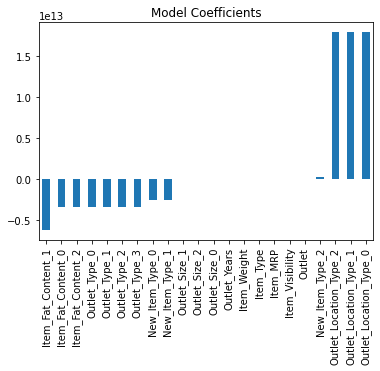

In [88]:
##Basic model for the start

from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True) ##this normalize parameter will normalize the dataset further
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()

coef.plot(kind='bar', title="Model Coefficients")

## From the graph we can say that the attributes up are positive coeff
## and bars down are negative coeff, variables without any bar does not provide any info

In [83]:
model.predict([[9.3,0.016047,4,249.8092,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0]])[0]

8.421875

Model Report
MSE: 0.4280298560568402
CV Score: 0.42892892515626435


<AxesSubplot:title={'center':'Model Coefficients'}>

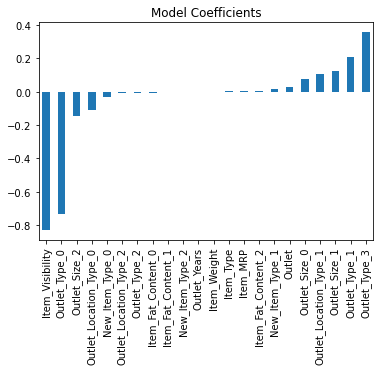

In [59]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

##Here the mean square error is increasing, but we need to reduce it
## LEsser the error better the model 
## here from the graph we can see the features are diff

In [85]:
model.predict([[9.3,0.016047,4,249.8092,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0]])[0]

8.079518438350968

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

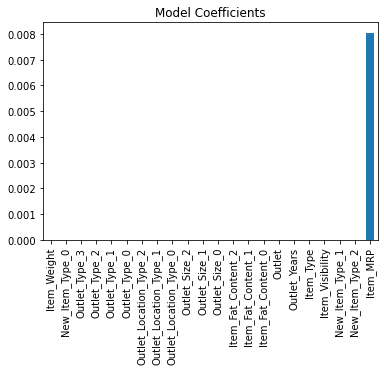

In [86]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

##It is taking only one variable

In [87]:
model.predict([[9.3,0.016047,4,249.8092,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0]])[0]

8.174304724662143

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.5739392027957375


<AxesSubplot:title={'center':'Feature Importance'}>

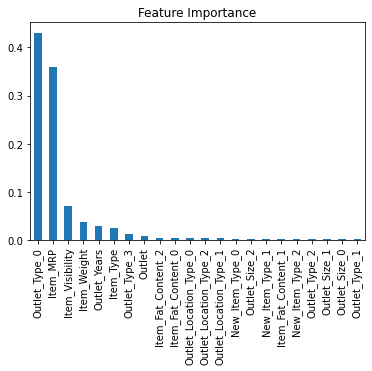

In [88]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

##Here the mean square error is very less so the model prediction on trainning set is good
## But the CV score is high, So the model is not performing that good, We decide which model is performing good based on CV score

In [89]:
model.predict([[9.3,0.016047,4,249.8092,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0]])[0]

8.225807736568045

Model Report
MSE: 0.04233238372424315
CV Score: 0.3106270959639077


<AxesSubplot:title={'center':'Feature Importance'}>

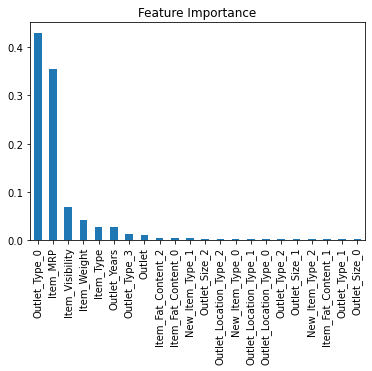

In [90]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

##It didn't overfit, and the model is having lesser cv score

In [91]:
model.predict([[9.3,0.016047,4,249.8092,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0]])[0]

8.299135186099551

Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.33156153391441767


<AxesSubplot:title={'center':'Feature Importance'}>

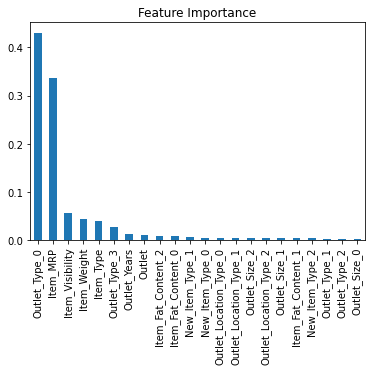

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [93]:
model.predict([[9.3,0.016047,4,249.8092,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0]])[0]

8.225807736568063

In [80]:
y.head(1)

0    8.225808
Name: Item_Outlet_Sales, dtype: float64